# Charts

In [ ]:
chicago_crimes <- read.csv('crimes.csv')

In [175]:
la_crimes <- read.csv('LA_crimes.csv')

## Columns and Rows info

In [176]:
names(chicago_crimes)

[1] "ID"                   "Case.Number"          "Date"                
 [4] "Block"                "IUCR"                 "Primary.Type"        
 [7] "Description"          "Location.Description" "Arrest"              
[10] "Domestic"             "Beat"                 "District"            
[13] "Ward"                 "Community.Area"       "FBI.Code"            
[16] "X.Coordinate"         "Y.Coordinate"         "Year"                
[19] "Updated.On"           "Latitude"             "Longitude"           
[22] "Location"

In [177]:
names(la_crimes)

[1] "DR.Number"              "Date.Reported"          "Date.Occurred"         
 [4] "Time.Occurred"          "Area.ID"                "Area.Name"             
 [7] "Reporting.District"     "Crime.Code"             "Crime.Code.Description"
[10] "MO.Codes"               "Victim.Age"             "Victim.Sex"            
[13] "Victim.Descent"         "Premise.Code"           "Premise.Description"   
[16] "Weapon.Used.Code"       "Weapon.Description"     "Status.Code"           
[19] "Status.Description"     "Crime.Code.1"           "Crime.Code.2"          
[22] "Crime.Code.3"           "Crime.Code.4"           "Address"               
[25] "Cross.Street"           "Location"

In [178]:
nrow(chicago_crimes)

[1] 6492877

In [179]:
nrow(la_crimes)

[1] 1621438

## Preprocessing

#### for Chicago

In [180]:
#cleaning
chicago_crimes <- subset(chicago_crimes, select = -c(Case.Number, IUCR, Updated.On, Beat, FBI.Code, Description, Location.Description))

In [182]:
#Add column hour of the day
chicago_crimes$Hour <- format(as.POSIXlt(chicago_crimes$Date, format = "%m/%d/%Y %I:%M:%S %p"),"%H")

In [183]:
#cleaning
chicago_crimes$Primary.Type[chicago_crimes$Primary.Type == "NON - CRIMINAL"] <- "NON-CRIMINAL"
chicago_crimes$Primary.Type[chicago_crimes$Primary.Type == "NON-CRIMINAL (SUBJECT SPECIFIED)"] <- "NON-CRIMINAL"

#### for LA

In [194]:
#Add year column
la_crimes$Year <- format(as.Date(la_crimes$Date.Occurred, format = "%m/%d/%Y"),"%Y")

In [200]:
la_crimes$Hour <- floor(la_crimes$Time.Occurred/100)

In [267]:
la_crimes$Hour <- factor(la_crimes$Hour)

## Common statistics charts

In [202]:
library(ggplot2)

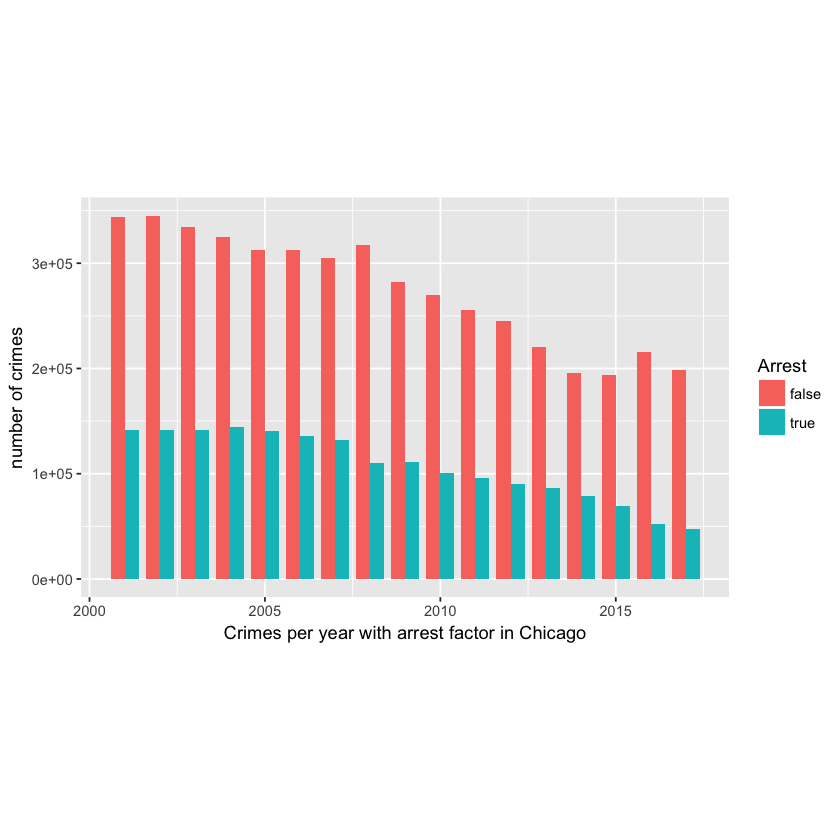

In [274]:
plot <- ggplot(chicago_crimes,aes(Year)) +
geom_bar(aes(fill = Arrest), position="dodge", width=0.8) +
coord_fixed(ratio=0.00003) +
labs(x="Crimes per year with arrest factor in Chicago", y="number of crimes") 
plot

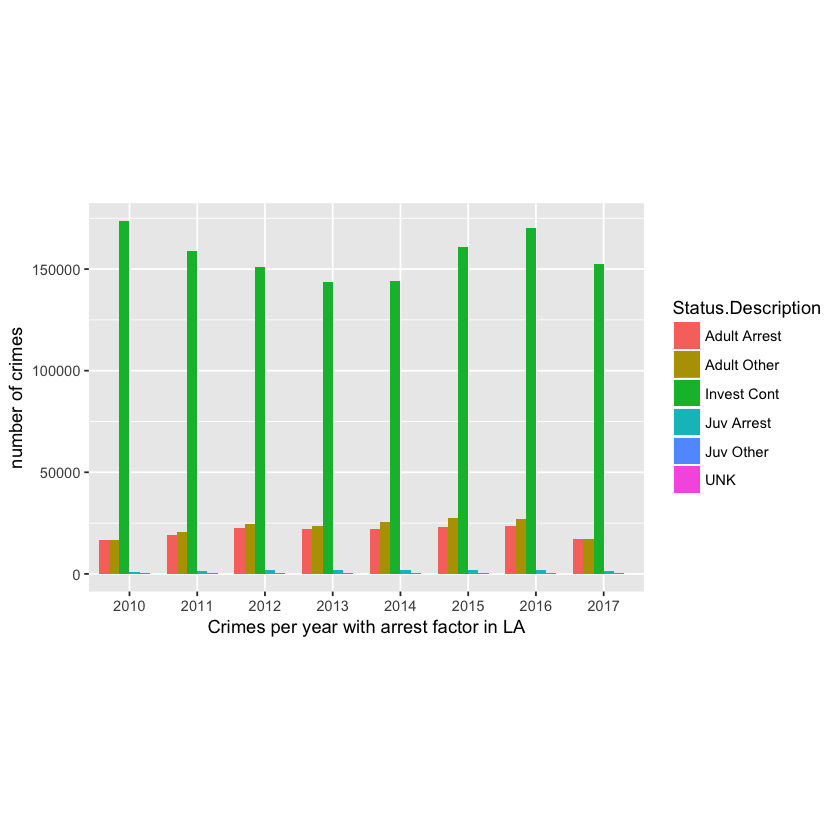

In [275]:
plot <- ggplot(la_crimes,aes(Year)) +
geom_bar(aes(fill = Status.Description),position="dodge") +
coord_fixed(ratio=0.00003) +
labs(x="Crimes per year with arrest factor in LA", y="number of crimes") 
plot

## Charts by crime type

### Preprocessing before results output

In [209]:
#Other narcotic violation added to narcotic violation
chicago_crimes$Primary.Type[chicago_crimes$Primary.Type == "OTHER NARCOTIC VIOLATION"] <- "NARCOTICS"

In [210]:
# Get number of crimes by type 
crimes_by_type <- group_by(chicago_crimes, chicago_crimes$Primary.Type)
crimes_number_by_type <- summarize(crimes_by_type, number = n())
names(crimes_number_by_type)[1] <- "crime"
crimes_number_by_type <- arrange(crimes_number_by_type, desc(number))

In [211]:
#Any offense with less than 10000 cases per all years added to common category 'Other Offense'
crimes_under_other_offense <- filter(crimes_number_by_type, number < 10000)
for (crime in crimes_under_other_offense$crime) {
    chicago_crimes$Primary.Type[chicago_crimes$Primary.Type == crime] <- "OTHER OFFENSE"
}

### Charts

In [212]:
# Now after preprocessing we need to get number of crimes by type again
crimes_by_type <- group_by(chicago_crimes, chicago_crimes$Primary.Type)
crimes_number_by_type <- summarize(crimes_by_type, number = n())
names(crimes_number_by_type)[1] <- "crime"
crimes_number_by_type

crime,number
ARSON,10812
ASSAULT,399339
BATTERY,1185097
BURGLARY,376833
CRIM SEXUAL ASSAULT,25388
CRIMINAL DAMAGE,745102
CRIMINAL TRESPASS,186853
DECEPTIVE PRACTICE,242951
GAMBLING,14225
INTERFERENCE WITH PUBLIC OFFICER,13915


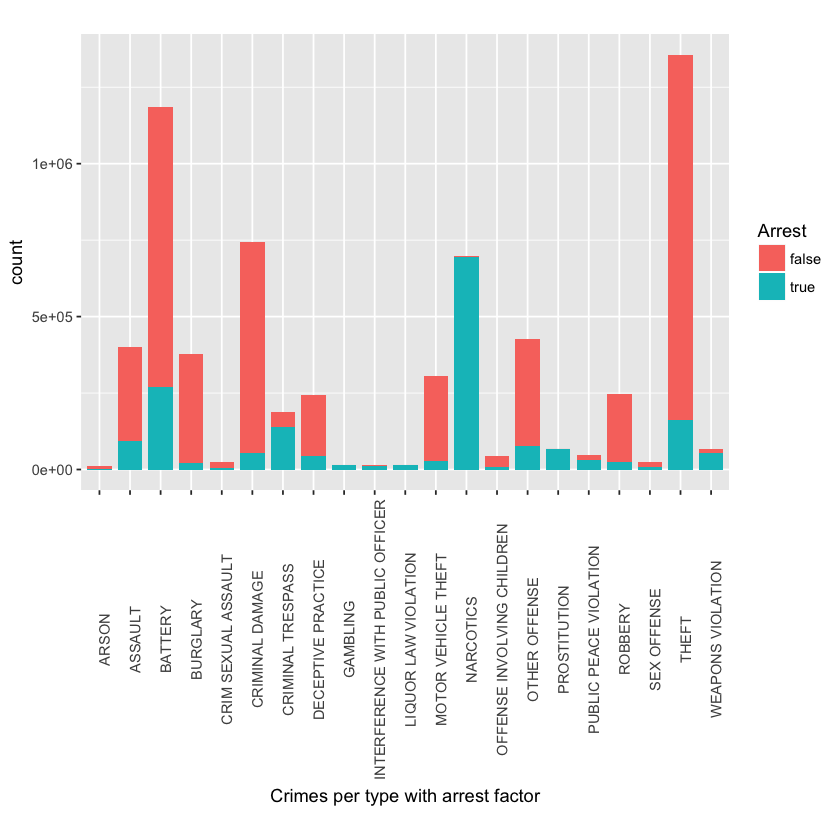

In [213]:
plot <- ggplot(chicago_crimes,aes(Primary.Type)) +
geom_bar(aes(fill = Arrest), width=0.8) +
coord_fixed(ratio=0.00001) +
labs(x="Crimes per type with arrest factor") 
plot + theme(axis.text.x = element_text(angle=90))

In [214]:
#Now we will add percent of succesful arrests
crimes_type_info <- subset(chicago_crimes, select = c(Primary.Type, Arrest))
crimes_succ_arrest <- filter(crimes_type_info, Arrest == 'true')
crimes_by_type_succ <- group_by(crimes_succ_arrest, crimes_succ_arrest$Primary.Type)
crimes_number_succ_arrest <- summarize(crimes_by_type_succ, number = n())
names(crimes_number_succ_arrest)[1] <- "crime"

In [215]:
crimes_number_succ_arrest

crime,number
ARSON,1418
ASSAULT,93620
BATTERY,270965
BURGLARY,21597
CRIM SEXUAL ASSAULT,4062
CRIMINAL DAMAGE,52853
CRIMINAL TRESPASS,138016
DECEPTIVE PRACTICE,43215
GAMBLING,14121
INTERFERENCE WITH PUBLIC OFFICER,12723


In [216]:
crimes_number_by_type$percent <- crimes_number_succ_arrest$number / crimes_number_by_type$number * 100

In [225]:
crimes_number_by_type <- arrange(crimes_number_by_type, percent)

In [228]:
crimes_number_by_type

crime,number,percent
BURGLARY,376833,5.731186
CRIMINAL DAMAGE,745102,7.093391
MOTOR VEHICLE THEFT,304681,9.214884
ROBBERY,246280,9.718207
THEFT,1356619,12.035730
ARSON,10812,13.115057
CRIM SEXUAL ASSAULT,25388,15.999685
DECEPTIVE PRACTICE,242951,17.787537
OTHER OFFENSE,425589,18.339760
OFFENSE INVOLVING CHILDREN,42915,21.509962


In [229]:
crimes_number_by_type$crime <- factor(crimes_number_by_type$crime, levels=c("BURGLARY","CRIMINAL DAMAGE","MOTOR VEHICLE THEFT","ROBBERY","THEFT","ARSON","CRIM SEXUAL ASSAULT","DECEPTIVE PRACTICE","OTHER OFFENSE","OFFENSE INVOLVING CHILDREN","BATTERY","ASSAULT","SEX OFFENSE","PUBLIC PEACE VIOLATION","CRIMINAL TRESPASS","WEAPONS VIOLATION","INTERFERENCE WITH PUBLIC OFFICER","LIQUOR LAW VIOLATION","GAMBLING","NARCOTICS","PROSTITUTION"))

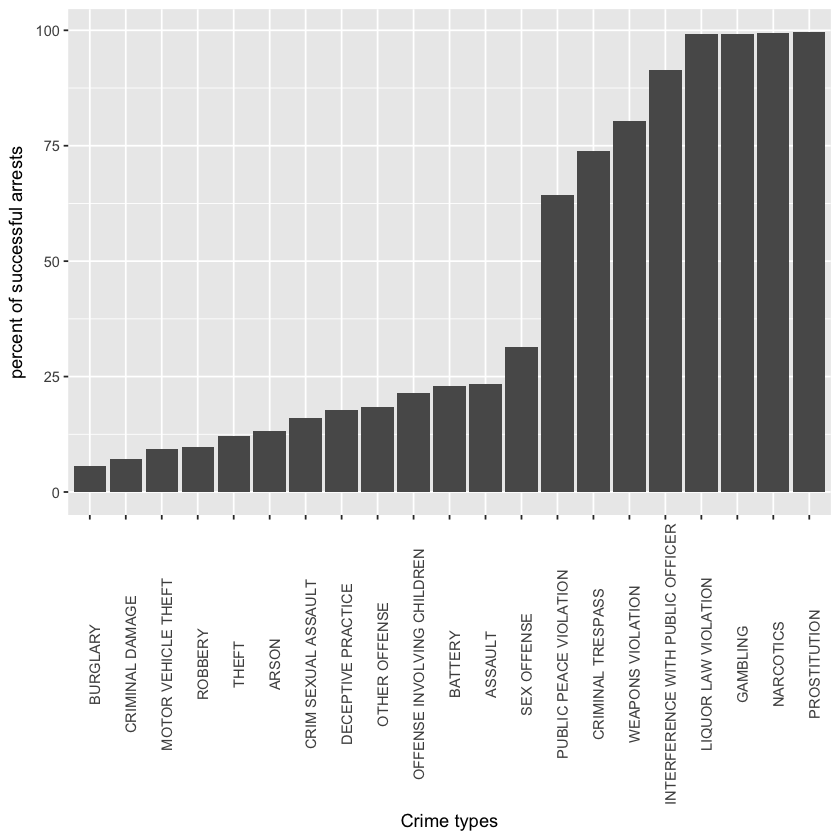

In [302]:
plot <- ggplot(crimes_number_by_type,aes(crime,percent)) +
geom_col() +
labs(x="Crime types", y="percent of successful arrests") 
plot + theme(axis.text.x = element_text(angle=90))

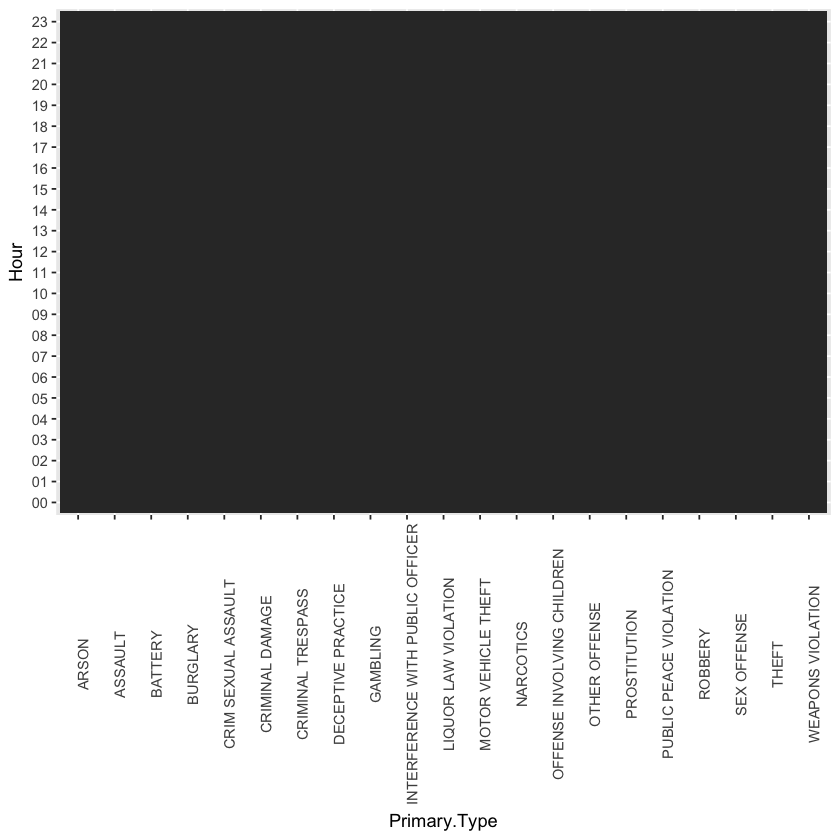

In [273]:
ggplot(chicago_crimes) + geom_tile(aes(x=Primary.Type,y=Hour)) + theme(axis.text.x = element_text(angle=90))

### Trends by hour of the day

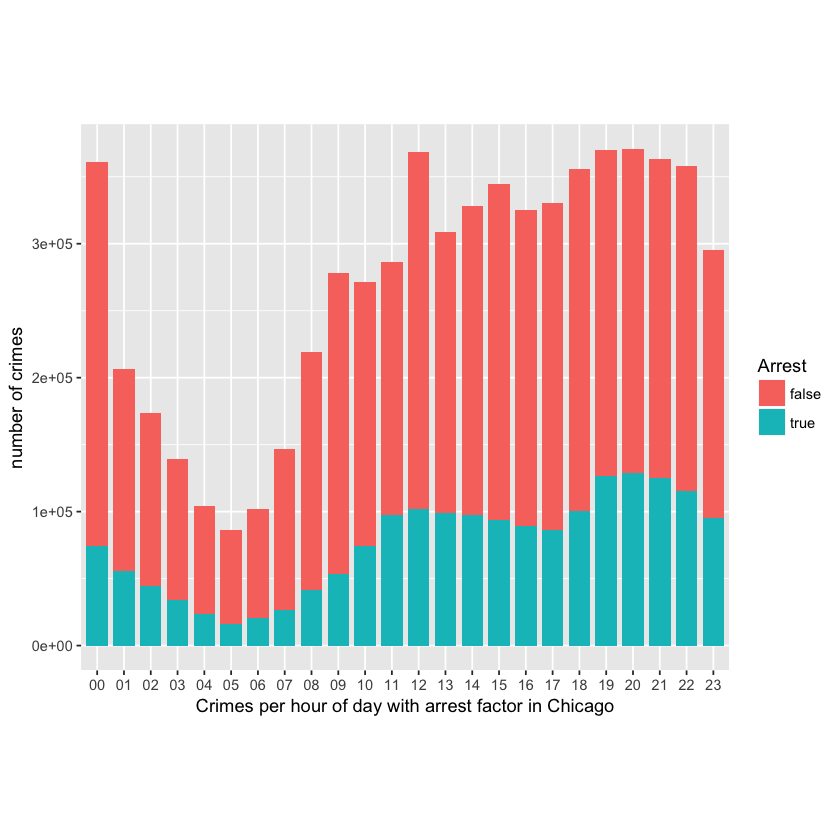

In [290]:
plot <- ggplot(chicago_crimes,aes(Hour)) +
geom_bar(aes(fill = Arrest), width=0.8) +
coord_fixed(ratio=0.00005) +
labs(x="Crimes per hour of day with arrest factor in Chicago", y="number of crimes") 
plot

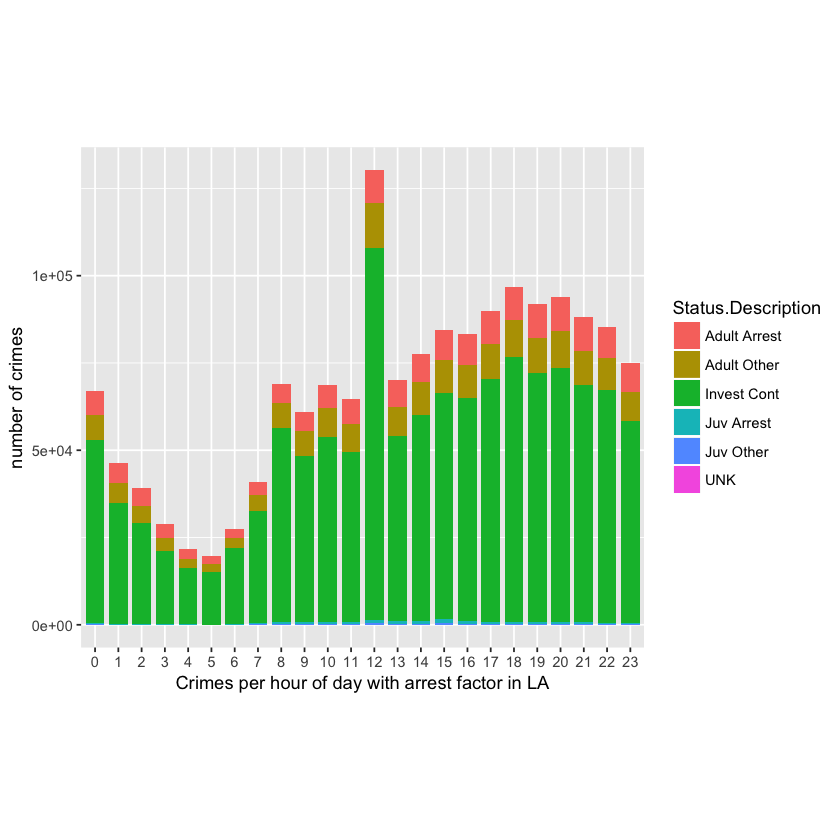

In [296]:
plot <- ggplot(la_crimes,aes(Hour)) +
geom_bar(aes(fill = Status.Description), width=0.8) +
coord_fixed(ratio=0.00015) +
labs(x="Crimes per hour of day with arrest factor in LA",y="number of crimes") 
plot

### Heatmap of crimes

In [ ]:
ch_2006 <- 

# Pie chart for distribution of crimes

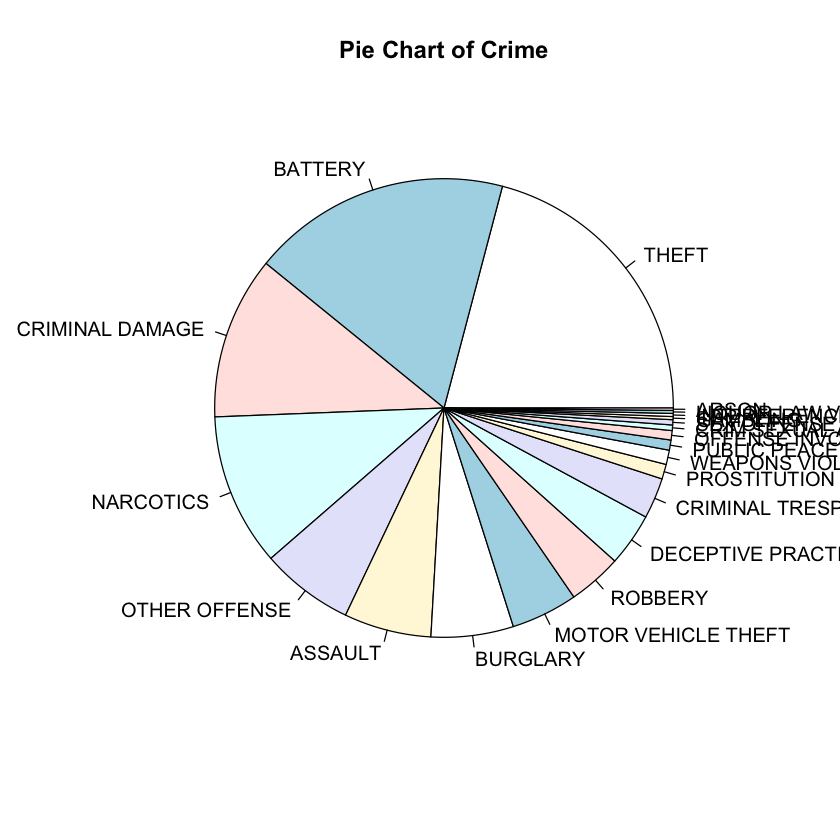

In [146]:
slices <- crimes_number_by_type$number
lbls <- crimes_number_by_type$crime
pie(slices, labels = lbls, main="Pie Chart of Crime")

In [14]:
types <- data.frame(type = crimes$Primary.Type, desc = crimes$Description)


In [15]:
names(types)

[1] "type" "desc"

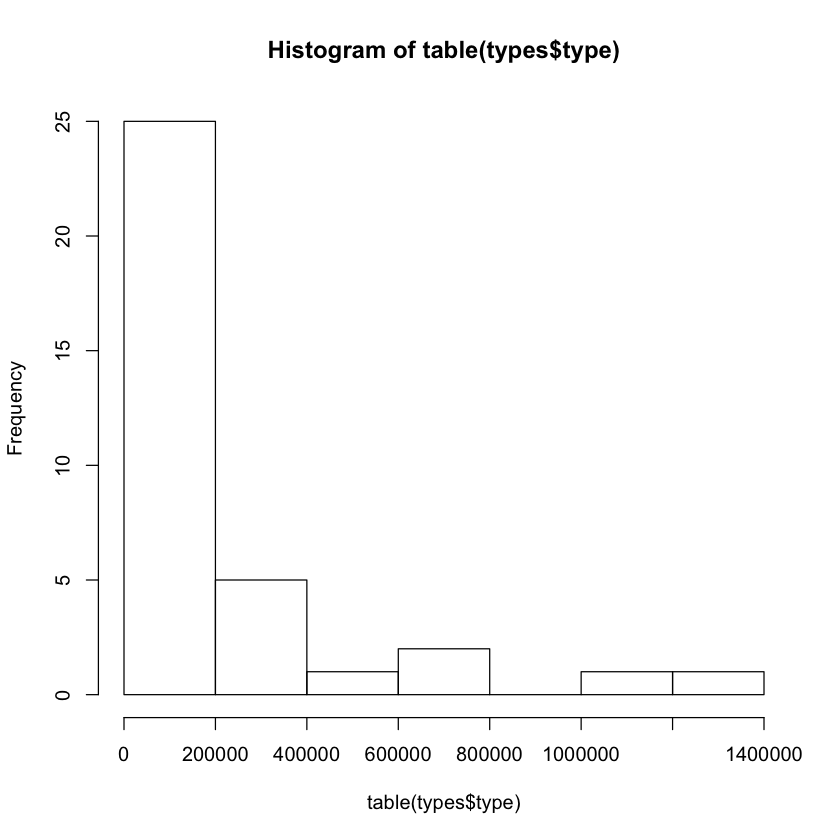

In [32]:
hist(table(types$type))

In [21]:
narcotics <- subset(types, type == 'NARCOTICS')
theft <- subset(types, type == 'THEFT')
prostitution <- subset(types, type == 'PROSTITUTION')

In [22]:
unique(prostitution)

,type,desc
9,PROSTITUTION,SOLICIT FOR PROSTITUTE
149,PROSTITUTION,SOLICIT FOR BUSINESS
188,PROSTITUTION,SOLICIT ON PUBLIC WAY
1435,PROSTITUTION,OTHER PROSTITUTION OFFENSE
2988,PROSTITUTION,PANDERING
6919,PROSTITUTION,CALL OPERATION
8686,PROSTITUTION,PATRONIZING A PROSTITUTE
39580,PROSTITUTION,PIMPING
54146,PROSTITUTION,SOLICIT OFF PUBLIC WAY
57404,PROSTITUTION,KEEP PLACE OF PROSTITUTION


In [8]:
head(crimes, 40)

ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,⋯,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",true,false,⋯,40,1,18,1164737,1944193,2006,04/15/2016 08:55:02 AM,42.00248,-87.66930,"(42.002478396, -87.66929687)"
4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),true,false,⋯,15,66,26,1161441,1863309,2006,04/15/2016 08:55:02 AM,41.78060,-87.68368,"(41.780595495, -87.68367553)"
4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,⋯,20,68,18,1174958,1866097,2006,04/15/2016 08:55:02 AM,41.78796,-87.63404,"(41.787955143, -87.634036744)"
4647373,HM244805,03/21/2006 04:45:00 PM,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,false,false,⋯,26,23,06,1154100,1907414,2006,04/15/2016 08:55:02 AM,41.90177,-87.70941,"(41.901774026, -87.709414574)"
4647374,HM245851,03/21/2006 10:00:00 PM,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,false,false,⋯,8,44,06,1184622,1851863,2006,04/15/2016 08:55:02 AM,41.74867,-87.59905,"(41.748674558, -87.599048654)"
4647375,HM245194,03/20/2006 11:00:00 PM,064XX S WOLCOTT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,false,false,⋯,15,67,07,1164792,1861919,2006,04/15/2016 08:55:02 AM,41.77671,-87.67143,"(41.776711023, -87.671429342)"
4647377,HM156475,02/01/2006 11:25:00 PM,032XX W DOUGLAS BLVD,2027,NARCOTICS,POSS: CRACK,SIDEWALK,true,false,⋯,24,29,18,1155120,1893275,2006,04/15/2016 08:55:02 AM,41.86295,-87.70605,"(41.86295478, -87.706047579)"
4647378,HM244549,03/21/2006 02:37:00 PM,081XX S MAY ST,1310,CRIMINAL DAMAGE,TO PROPERTY,"SCHOOL, PUBLIC, BUILDING",false,false,⋯,21,71,14,1170069,1850820,2006,04/15/2016 08:55:02 AM,41.74614,-87.65241,"(41.746140855, -87.652406156)"
4647379,HM171239,02/09/2006 05:38:07 AM,080XX S EXCHANGE AVE,1512,PROSTITUTION,SOLICIT FOR PROSTITUTE,STREET,true,false,⋯,7,46,16,1197222,1852411,2006,04/15/2016 08:55:02 AM,41.74987,-87.55286,"(41.749873967, -87.552860394)"
4647380,HL762080,11/29/2005 03:10:00 PM,112XX S WALLACE ST,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",false,false,⋯,34,49,14,1174313,1830380,2005,04/15/2016 08:55:02 AM,41.68996,-87.63746,"(41.68995741, -87.637460623)"
